# **Chicago Crimes Analysis**

## Import Libraries

In [1]:
import pandas as pd # Dataframe operations
import matplotlib.pyplot as plt # Plots
import seaborn as sns # Plots

from datetime import datetime # Convert to datetime 

plt.rcParams['figure.figsize'] = [10, 5]

## Load Data

Data of crimes in Chicago since 2017 until 2023

In [2]:
df = pd.read_csv("Data/Chicago_Crimes_2017-2023.csv")
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13327763,JH103488,12/31/2023 11:59:00 PM,010XX N ORLEANS ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,27.0,8.0,14,1173727.0,1907173.0,2023,01/08/2024 03:59:56 PM,41.900698,-87.637330,"(41.900698378, -87.637329754)"
1,13325009,JH100002,12/31/2023 11:51:00 PM,051XX S PRINCETON AVE,0550,ASSAULT,AGGRAVATED POLICE OFFICER - HANDGUN,STREET,True,False,...,20.0,37.0,04A,1175152.0,1871065.0,2023,01/17/2024 03:41:31 PM,41.801584,-87.633177,"(41.801583507, -87.633177068)"
2,13324997,JH100010,12/31/2023 11:51:00 PM,009XX E 77TH ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,APARTMENT,False,True,...,8.0,69.0,04A,1183685.0,1854148.0,2023,01/08/2024 03:59:56 PM,41.754967,-87.602411,"(41.754966726, -87.602410989)"
3,13327752,JH102557,12/31/2023 11:50:00 PM,001XX W WACKER DR,0890,THEFT,FROM BUILDING,BAR OR TAVERN,False,False,...,42.0,32.0,06,1175349.0,1902127.0,2023,01/08/2024 03:59:56 PM,41.886816,-87.631524,"(41.886815622, -87.631523712)"
4,13324881,JH100006,12/31/2023 11:50:00 PM,051XX S WASHTENAW AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,14.0,63.0,08B,1159244.0,1870437.0,2023,01/08/2024 03:59:56 PM,41.800201,-87.691535,"(41.800200965, -87.691535096)"


In [3]:
# Shape
df.shape

(1722109, 22)

In [4]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1722109 entries, 0 to 1722108
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

The description of each column is showed in the [Chicago Data Portal](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2)

## Exploratory Data Analysis (EDA)

In [5]:
# Convert date columns into date_time type

df["Date"] = pd.to_datetime(df["Date"])
df.info()

C:\Users\acast\AppData\Local\Temp\ipykernel_17380\2838153455.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1722109 entries, 0 to 1722108
Data columns (total 22 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Case Number           object        
 2   Date                  datetime64[ns]
 3   Block                 object        
 4   IUCR                  object        
 5   Primary Type          object        
 6   Description           object        
 7   Location Description  object        
 8   Arrest                bool          
 9   Domestic              bool          
 10  Beat                  int64         
 11  District              float64       
 12  Ward                  float64       
 13  Community Area        float64       
 14  FBI Code              object        
 15  X Coordinate          float64       
 16  Y Coordinate          float64       
 17  Year                  int64         
 18  Updated On            object        
 19  

In [6]:
# Extract date information

df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df["Day_Week"] = df["Date"].dt.dayofweek
df["Hour"] = df["Date"].dt.hour
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day,Day_Week,Hour
0,13327763,JH103488,2023-12-31 23:59:00,010XX N ORLEANS ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,1907173.0,2023,01/08/2024 03:59:56 PM,41.900698,-87.637330,"(41.900698378, -87.637329754)",12,31,6,23
1,13325009,JH100002,2023-12-31 23:51:00,051XX S PRINCETON AVE,0550,ASSAULT,AGGRAVATED POLICE OFFICER - HANDGUN,STREET,True,False,...,1871065.0,2023,01/17/2024 03:41:31 PM,41.801584,-87.633177,"(41.801583507, -87.633177068)",12,31,6,23
2,13324997,JH100010,2023-12-31 23:51:00,009XX E 77TH ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,APARTMENT,False,True,...,1854148.0,2023,01/08/2024 03:59:56 PM,41.754967,-87.602411,"(41.754966726, -87.602410989)",12,31,6,23
3,13327752,JH102557,2023-12-31 23:50:00,001XX W WACKER DR,0890,THEFT,FROM BUILDING,BAR OR TAVERN,False,False,...,1902127.0,2023,01/08/2024 03:59:56 PM,41.886816,-87.631524,"(41.886815622, -87.631523712)",12,31,6,23
4,13324881,JH100006,2023-12-31 23:50:00,051XX S WASHTENAW AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,1870437.0,2023,01/08/2024 03:59:56 PM,41.800201,-87.691535,"(41.800200965, -87.691535096)",12,31,6,23


**1. How has been the change of numbers of crimes from 2017 to 2023?**

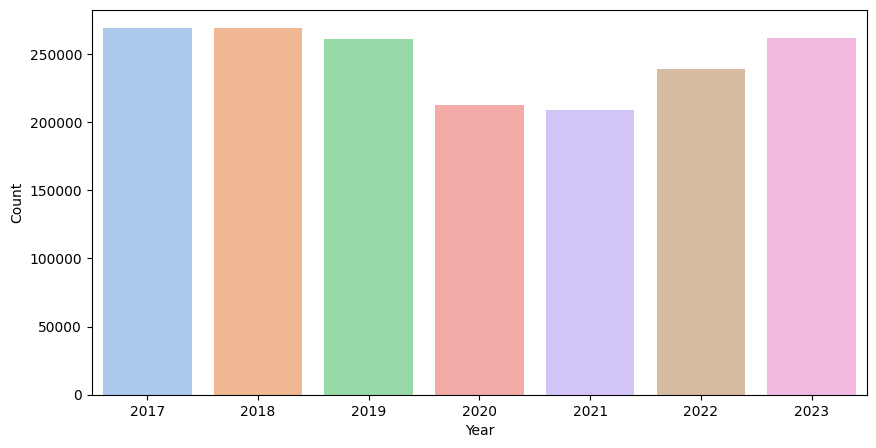

In [7]:
sns.countplot(data = df, x = "Year", hue = "Year", palette = "pastel", legend = False)
plt.ylabel("Count")
plt.show()


*There was a reduction in the number of crimes in 2020 and 2021, possibly due to the of COVID-19 pandemic*

**2. What are the months, days of the week, and time of day with the highest crime rates?**

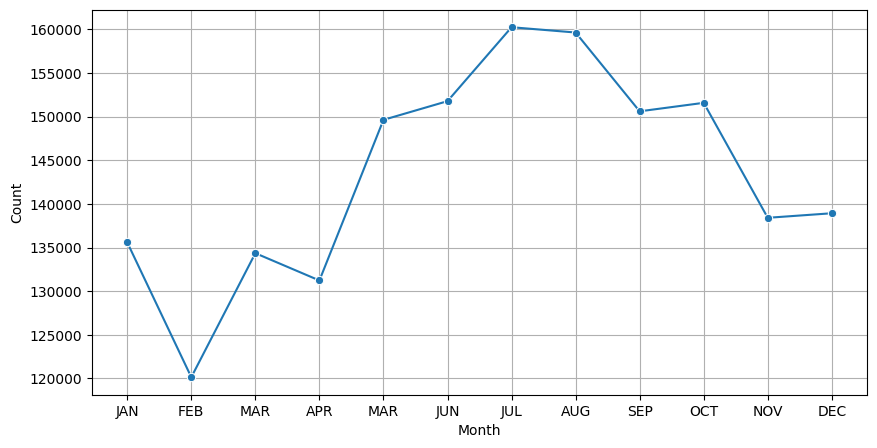

In [22]:
# Month
sns.lineplot(x = "Month", 
             y = "count", 
             data = df["Month"].value_counts().reset_index(), 
             marker = "o")
plt.ylabel("Count")
plt.xticks(range(1,13), ['JAN', 'FEB', 'MAR', 'APR', 'MAR', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'])
plt.grid()
plt.show()

The months with more crimes are *July* and *August*, these are summer months, therefore, the high number of crimes could be related to an increase in the number of persons in the city. 

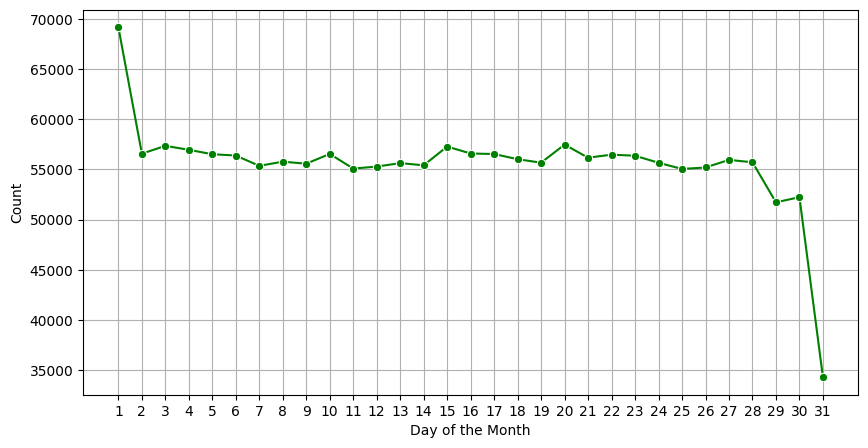

In [28]:
# Day of the month
sns.lineplot(x = "Day", 
             y = "count", 
             data = df["Day"].value_counts().reset_index(), 
             marker = "o",
             color = "g")
plt.ylabel("Count")
plt.xlabel("Day of the Month")
plt.xticks(range(1,32))
plt.grid()
plt.show()

The first day of the month has a high rate of crimes, but this could be a data registration problem. If a crime is not upload with all the date information it's possibly that the system set the day of the crime as the first day of the month. 

On the other hand, days *29*, *30* and*31* has a low rate of crimes, because no all months have 29, 30 and 31 days. 

So lets plot the same graph without taking into account the first and last days

In [46]:
df_days_2_28 = df[~((df["Day"] == 1) | (df["Day"] == 31) | (df["Day"] == 30) | (df["Day"] == 29))]
df_days_2_28.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day,Day_Week,Hour
2054,13321996,JG558059,2023-12-28 23:55:00,062XX N NORTHWEST HWY,0560,ASSAULT,SIMPLE,STREET,True,False,...,1941240.0,2023,01/05/2024 03:40:51 PM,41.995073,-87.803602,"(41.995073143, -87.803602196)",12,28,3,23
2055,13322060,JG558080,2023-12-28 23:54:00,018XX E 72ND ST,0820,THEFT,$500 AND UNDER,APARTMENT,False,True,...,1857599.0,2023,01/05/2024 03:40:51 PM,41.764293,-87.580089,"(41.764293116, -87.580088719)",12,28,3,23
2056,13322002,JG558064,2023-12-28 23:45:00,040XX E 134TH ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,1816604.0,2023,01/05/2024 03:40:51 PM,41.651431,-87.527258,"(41.651431329, -87.527258234)",12,28,3,23
2057,13322302,JG558468,2023-12-28 23:30:00,023XX E 70TH ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,1858996.0,2023,01/05/2024 03:40:51 PM,41.768055,-87.569202,"(41.768054998, -87.569201619)",12,28,3,23
2058,13322131,JG558204,2023-12-28 23:30:00,074XX S ROCKWELL ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,1855411.0,2023,01/05/2024 03:40:51 PM,41.758945,-87.687984,"(41.758945308, -87.687984275)",12,28,3,23


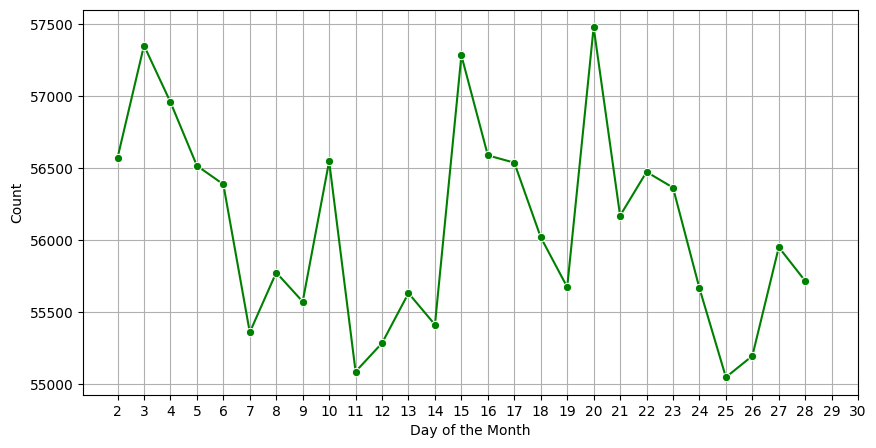

In [47]:
sns.lineplot(x = "Day", 
             y = "count", 
             data = df_days_2_28["Day"].value_counts().reset_index(), 
             marker = "o",
             color = "g")
plt.ylabel("Count")
plt.xlabel("Day of the Month")
plt.xticks(range(2,31))
plt.grid()
plt.show()

Now we can see the days with most rate of crimes are the 3rd, 15th and 20th.

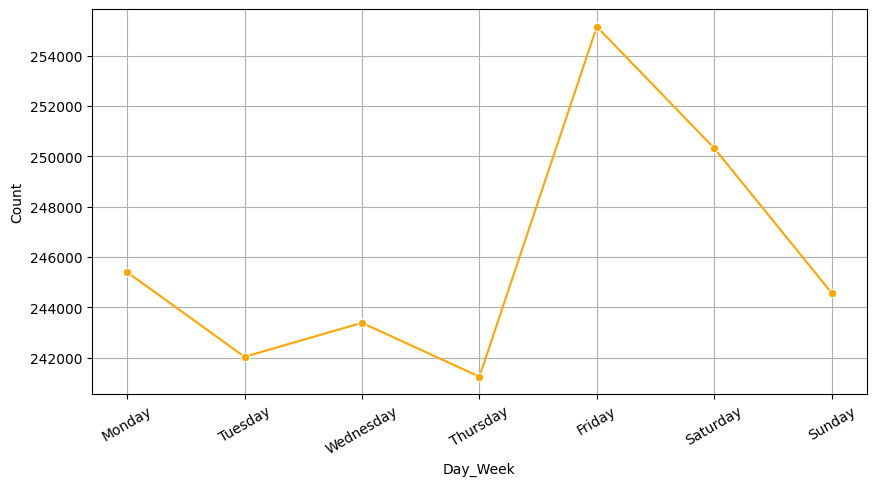

In [49]:
# Dayweek

ax = sns.lineplot(x = "Day_Week", 
             y = "count", 
             data = df["Day_Week"].value_counts().reset_index(), 
             marker = "o",
             color = "orange")

ax.set_ylabel("Count")
ax.set_xticks(range(0,7))
ax.set_xticklabels(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
                  rotation = 30)
plt.grid()
plt.show()

The days with highest rate of crimes are *Friday* and *Saturday*. Weekends makes people slightly crazy.

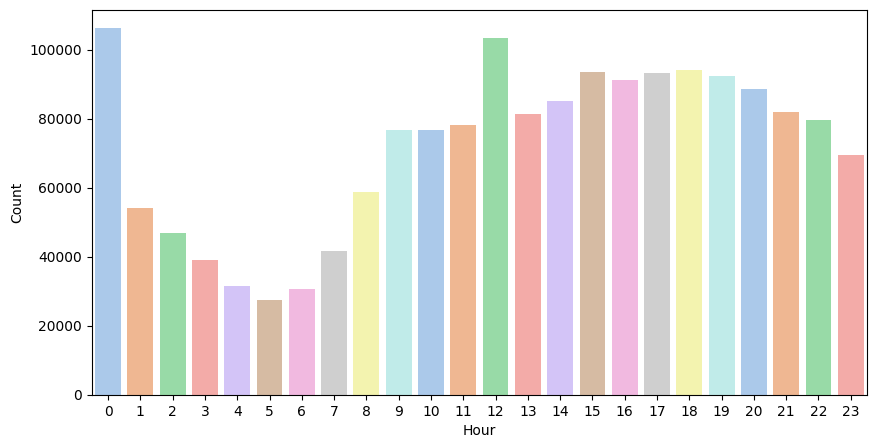

In [57]:
# Hour

sns.barplot(data = df["Hour"].value_counts().reset_index(), x = "Hour", y = "count", hue = "Hour", palette = "pastel", legend = False)
plt.ylabel("Count")
plt.show()

The highest rate of crimes at 00:00, could be a similar case as the first day of the month, an error uploading the data. Without taking into account that hour, noon is when most of crimes occurs, followed by the evening.

**4. What are the most common Types of Crimes?**

In [ ]:
df_most_crimes =pd.DataFrame(df.groupby(by = "Primary Type").size()).reset_index()
df_most_crimes.columns = ["Primary Type", "Count"]
df_most_crimes.sort_values(by = "Count", ascending = False, inplace = True)
df_most_crimes

In [ ]:
sns.barplot(x = "Primary Type", 
             y = "Count", 
             data = df_most_crimes[0:10])
plt.xticks(rotation = 90)
plt.show()

**Asnwer**---